**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [0]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [0]:
print(train_images.shape[1:])

(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [0]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


#convert data to float and scale values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')
train_data_dup = train_data.astype('float')
test_data_dup = test_data.astype('float')

#scale data

In [0]:
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
past = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.2641 - acc: 0.9187 - val_loss: 0.1741 - val_acc: 0.9432
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0919 - acc: 0.9711 - val_loss: 0.1006 - val_acc: 0.9667
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0577 - acc: 0.9819 - val_loss: 0.0714 - val_acc: 0.9786
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0391 - acc: 0.9872 - val_loss: 0.0638 - val_acc: 0.9824
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0307 - acc: 0.9908 - val_loss: 0.0733 - val_acc: 0.9787
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0224 - acc: 0.9932 - val_loss: 0.0720 - val_acc: 0.9814
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0171 - acc: 0.9943 - val_loss: 0.0695 - val_acc

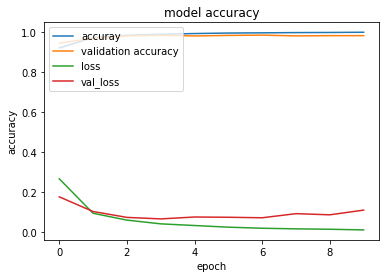

In [0]:

import matplotlib.pyplot as plt
plt.plot(past.history['acc'])
plt.plot(past.history['val_acc'])
plt.plot(past.history['loss'])
plt.plot(past.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

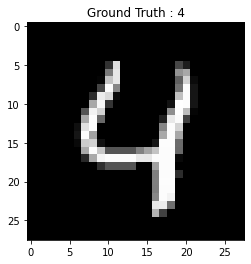

In [0]:
plt.imshow(test_images[4,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[4]))
plt.show()

In [0]:

x=model.predict_classes(test_data[[4],:])
print("Predicted label",test_labels[x])

Predicted label [4]


In [0]:
m = Sequential()
m.add(Dense(512, activation='relu', input_shape=(dimData,)))
m.add(Dense(512, activation='relu'))
m.add(Dense(512, activation='tanh'))
m.add(Dense(512, activation='sigmoid'))
m.add(Dense(10, activation='softmax'))
m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
m.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.3274 - acc: 0.8961 - val_loss: 0.1795 - val_acc: 0.9468
Epoch 2/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1029 - acc: 0.9685 - val_loss: 0.2261 - val_acc: 0.9236
Epoch 3/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0652 - acc: 0.9799 - val_loss: 0.1082 - val_acc: 0.9702
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0481 - acc: 0.9851 - val_loss: 0.0797 - val_acc: 0.9781
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0364 - acc: 0.9894 - val_loss: 0.0826 - val_acc: 0.9785
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0286 - acc: 0.9915 - val_loss: 0.1179 - val_acc: 0.9718
Epoch 7/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0245 - acc: 0.9925 - val_loss: 0.1375 - val_acc

In [0]:

p = Sequential()
p.add(Dense(512, activation='relu', input_shape=(dimData,)))
p.add(Dense(512, activation='relu'))
p.add(Dense(10, activation='softmax'))
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_data_dup, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data_dup, test_labels_one_hot)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/step - loss: 11.4469 - acc: 0.2890 - val_loss: 8.9246 - val_acc: 0.4456
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 8.6941 - acc: 0.4601 - val_loss: 8.4895 - val_acc: 0.4728
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 8.5042 - acc: 0.4719 - val_loss: 8.3952 - val_acc: 0.4789
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 8.4632 - acc: 0.4747 - val_loss: 8.4307 - val_acc: 0.4765
Epoch 5/10
60000/60000 [==============================] - 1s 17us/step - loss: 8.3596 - acc: 0.4811 - val_loss: 8.1567 - val_acc: 0.4938
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 8.3566 - acc: 0.4814 - val_loss: 8.1504 - val_acc: 0.4942
Epoch 7/10
60000/60000 [==============================] - 1s 17us/step - loss: 8.3736 - acc: 0.4803 - val_loss: 8.1876 - val_ac